In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse

# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None

mnist = input_data.read_data_sets('./data/MNIST', one_hot=True)

Extracting ./data/MNIST/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/t10k-labels-idx1-ubyte.gz


//anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


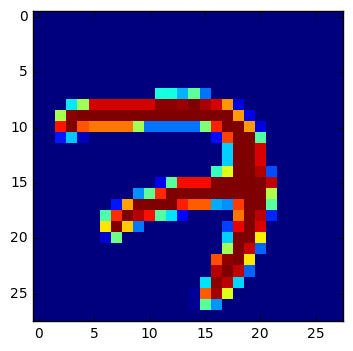

In [3]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = mnist.train.next_batch(5)
plt.imshow(np.reshape(images[0], (28, 28)), interpolation='nearest')
plt.show()


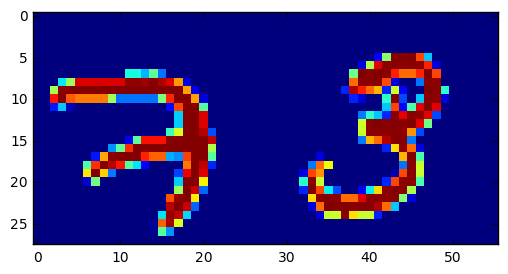

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


In [4]:
result = np.concatenate((np.reshape(images[0], (28, 28)), np.reshape(images[1], (28, 28))), axis = 1)
result_label = np.concatenate((labels[0], labels[1]), axis = 0)
plt.imshow(result, interpolation='nearest')
plt.show()
print (np.reshape(result_label, (2, 10)))

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


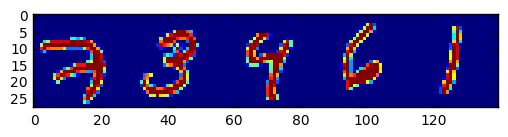

In [5]:
def concat_images(images):
    if images.shape[0] == 1:
        return np.reshape(images, (28, 28))
    return np.concatenate((np.reshape(images[0], (28,28)), concat_images(images[1:])), axis = 1)

def concat_labels(labels):
    if labels.shape[0] == 1:
        return labels
    return np.concatenate((labels[0], concat_labels(labels[1:])), axis = 1)

result = concat_images(images[0:5])
print (labels[0:5].flatten())
plt.imshow(result, interpolation='nearest')
plt.show()

In [6]:
blank = np.zeros((28, 28))
blank_label = np.zeros((1, 11))
blank_label[0][10] = 1
blank_label = blank_label.flatten()

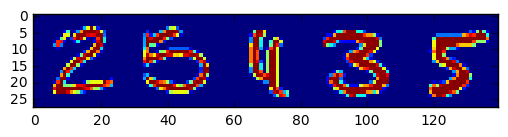

[2 5 4 3 5]


In [14]:
import random
import math
digits = 5

def decode_labels(labels):
    result = 0
    for i in range(labels.shape[0]):
        result *= 10
        result += np.ndarray.argmax(labels[i], axis = 0)
    return result

def gen_train_example():
    r = random.randint(1, 10**digits-1)
    noOfBlanks = digits - 1 - int(math.log10(r))
    images, labels = mnist.train.next_batch(digits-noOfBlanks)
    result_image = concat_images(images)
    blanks = np.zeros((28, noOfBlanks*28))
    result_image = np.concatenate((blanks, result_image), axis = 1)
    result_label = np.concatenate((labels, np.zeros((labels.shape[0], 1))), axis = 1)
    result_label = result_label.flatten()
    for _ in range(noOfBlanks):
        result_label = np.concatenate((blank_label, result_label), axis = 0)
    return result_image, result_label

def gen_train_examples(size):
    img = np.ndarray(shape=(size,28, 28*digits))
    lbl = np.ndarray(shape=(size, 11*digits))
    for i in range(size):
        img[i], lbl[i] = gen_train_example()
    return img, lbl

def gen_test_example():
    r = random.randint(1, 10**digits-1)
    noOfBlanks = digits - 1 - int(math.log10(r))
    images, labels = mnist.test.next_batch(digits-noOfBlanks)
    result_image = concat_images(images)
    blanks = np.zeros((28, noOfBlanks*28))
    result_image = np.concatenate((blanks, result_image), axis = 1)
    result_label = np.concatenate((labels, np.zeros((labels.shape[0], 1))), axis = 1)
    result_label = result_label.flatten()
    for _ in range(noOfBlanks):
        result_label = np.concatenate((blank_label, result_label), axis = 0)
    return result_image, result_label

def gen_test_examples(size):
    img = np.ndarray(shape=(size,28, 28*digits))
    lbl = np.ndarray(shape=(size, 11*digits))
    for i in range(size):
        img[i], lbl[i] = gen_test_example()
    return img, lbl

images, labels = gen_train_examples(2)
plt.imshow(images[0], interpolation='nearest')
plt.show()
print (np.argmax(np.reshape(labels[0], (digits, 11)), 1))

In [10]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse

FLAGS = None
input_image_size = 28*28*digits

learning_rate = tf.placeholder(tf.float32, shape=[])

# Create the model
x = tf.placeholder(tf.float32, [None, 28, 28*digits]) 
x_image = tf.reshape(x, [-1,28,28*digits,1])

keep_prob = tf.placeholder(tf.float32)

## First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
  
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
  
## Second Convolutional Layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

## Densely Connected Layer 1
W_fc1 = weight_variable([7 * 7 * digits * 64, 4*1024])
b_fc1 = bias_variable([4*1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*digits*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

## Densely Connected Layer 2
W_fc2 = weight_variable([4*1024, 1024])
b_fc2 = bias_variable([1024])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2)
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

## Readout Layer
W_fc3 = weight_variable([1024, 11*digits])
b_fc3 = bias_variable([11*digits])

y_conv = tf.matmul(h_fc2_drop, W_fc3) + b_fc3
y_conv_r = tf.reshape(y_conv, [-1, digits, 11])

y_ = tf.placeholder(tf.float32, [None, 11*digits])
y_r = tf.reshape(y_, [-1, digits, 11])

cross_entropy = tf.reduce_mean(  tf.nn.softmax_cross_entropy_with_logits(y_conv_r[0], y_r[0]) 
                               + tf.nn.softmax_cross_entropy_with_logits(y_conv_r[1], y_r[1]) 
                               + tf.nn.softmax_cross_entropy_with_logits(y_conv_r[2], y_r[2])
                               + tf.nn.softmax_cross_entropy_with_logits(y_conv_r[3], y_r[3])
                               + tf.nn.softmax_cross_entropy_with_logits(y_conv_r[4], y_r[4]))

train_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)


correct_prediction = tf.equal(tf.argmax(y_conv_r, 2), tf.argmax(y_r, 2))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
for i in range(10001):
  batch_images, batch_labels = gen_train_examples(50)
  lr = 0.001
  loss = train_step.run(feed_dict={x: batch_images, y_: batch_labels, keep_prob: 1.0, learning_rate: lr})
  if i%100 == 0:
    batch_images, batch_labels = gen_train_examples(200)
    loss, train_accuracy = sess.run([cross_entropy, accuracy], feed_dict={x:batch_images, y_: batch_labels, keep_prob: 1.0, learning_rate: lr})
#    train_accuracy = accuracy.eval(feed_dict={x:batch_images, y_: batch_labels, keep_prob: 1.0})
    print("step %d, training accuracy %g, loss %g"%(i, train_accuracy, loss))
  
test_imgs, test_labels = gen_test_examples(1000)
print("test accuracy %g"%accuracy.eval(feed_dict={
  x: test_imgs, y_: test_labels, keep_prob: 1.0}))

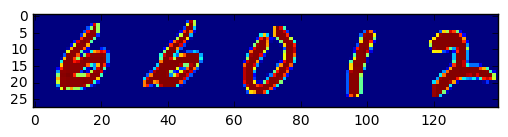

[[  2.62967110e-01   7.15358090e-03   1.95071384e-01   1.20045952e-02
    1.91014837e-02   1.52054593e-01   1.84632704e-01   1.33866083e-03
    1.62427381e-01   2.75149918e-03   4.96939698e-04]
 [  1.26636520e-01   2.73419786e-02   4.69228715e-01   6.36205822e-03
    1.00116869e-02   1.11409537e-01   2.15985894e-01   1.86249657e-04
    3.25931497e-02   2.28297329e-04   1.60531290e-05]
 [  4.17879134e-01   1.78047121e-02   1.09941646e-01   1.95174500e-01
    7.09488848e-03   1.49658829e-01   2.21692510e-02   8.79097637e-03
    6.44748658e-02   6.97682053e-03   3.43751090e-05]
 [  1.51012437e-02   3.36094052e-01   1.22075789e-02   5.20026870e-02
    4.71081883e-02   1.74857199e-01   6.11977465e-02   6.52293712e-02
    1.76444679e-01   5.97490221e-02   8.18123317e-06]
 [  4.70878631e-02   9.33647901e-02   1.43551990e-01   6.09734766e-02
    4.66033429e-01   3.36481258e-02   7.33330697e-02   4.03381772e-02
    2.46644653e-02   1.69964749e-02   8.20436162e-06]]
[0 2 0 1 4]
[6 6 0 1 2]


In [89]:
def decode(output):
    result = ''
    for x in output:
        if x != 10:
            result = result + str(x)
    return result


test_imgs, test_labels = gen_test_examples(1)
plt.imshow(test_imgs[0], interpolation='nearest')
plt.show()
pred = y_conv.eval(feed_dict={x:test_imgs, keep_prob: 1.0})
pred = tf.reshape(pred, (digits, 11))
pred = tf.nn.softmax(pred)
print (pred.eval())
pred = tf.argmax(pred, 1)
print (pred.eval())
print (np.argmax(tf.reshape(test_labels, (digits, 11)).eval(), 1))